#  **Pandas Project**
Proyecto sobre la relación de los ataques de tiburones y el surf en el mundo.

###  **Estudio y limpieza de los datos**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Input/GSAF5.csv") 

In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
print(df.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [5]:
df = df.rename(columns={"Sex ": "Sex"})
df = df.rename(columns={"Species ": "Species"})

In [6]:
#selecciono las columnas que me interesan para estudiar cómo ha afectado la moda del surf en los ataques de tiburones.
df=df[['Case Number','Year','Country','Activity']]
df.head(10)

,Case Number,Year,Country,Activity
0,2016.09.18.c,2016,USA,Surfing
1,2016.09.18.b,2016,USA,Surfing
2,2016.09.18.a,2016,USA,Surfing
3,2016.09.17,2016,AUSTRALIA,Surfing
4,2016.09.15,2016,AUSTRALIA,Surfing
5,2016.09.15.R,2016,AUSTRALIA,Fishing
6,2016.09.11,2016,USA,Wading
7,2016.09.07,2016,USA,Swimming
8,2016.09.06,2016,NEW CALEDONIA,Kite surfing
9,2016.09.05.b,2016,USA,Boogie boarding


In [7]:
df=df.rename(columns={'Case Number':'Case Id'})

In [8]:
df.shape

(5992, 4)

In [9]:
#elimino filas duplicadas
df.drop_duplicates(subset ="Case Id", keep = False, inplace = True) 

In [10]:
df.shape

(5960, 4)

In [11]:
print(df.dtypes)

Case Id     object
Year         int64
Country     object
Activity    object
dtype: object


In [12]:
surf_df = df[(df['Activity']=='Surfing')] 

In [13]:
surf_df.shape

(898, 4)

In [14]:
df["Activity"].value_counts().head(30)

Surfing            898
Swimming           818
Fishing            411
Spearfishing       319
Bathing            153
Wading             141
Diving             123
Standing            97
Snorkeling          76
Scuba diving        73
Body boarding       54
Body surfing        48
Swimming            47
Pearl diving        32
Treading water      32
Kayaking            28
Free diving         26
Boogie boarding     26
Fell overboard      21
Windsurfing         18
Boogie Boarding     16
Shark fishing       15
Walking             15
Surf skiing         12
Fishing             12
Floating            12
Canoeing            12
Rowing              12
Surf-skiing         12
Surf fishing        11
Name: Activity, dtype: int64

In [15]:
#compruebo el número de valores nulos por columna
null_cols = df.isnull().sum()
null_cols

Case Id       0
Year          0
Country      43
Activity    522
dtype: int64

In [16]:
#le doy un valor a los nulos de la columna país porque me interesa más la actividad que el país
df["Country"].fillna("Unknown", inplace = True) 

In [17]:
#elimino los nulos
df=df.dropna() 

In [18]:
df.shape

(5438, 4)

In [19]:
#set(df["Activity"])

In [20]:
#busco las actividades que tienen surf y modalidades asociados como Surf-skiing, Kite-surfing o windsurfing.
#encuentro problemas porque también aparece la palabra surface.
import re
x='Resting on Surfing board'
print(re.search(r"[Ss]urf[\sib]", x))

<_sre.SRE_Match object; span=(11, 16), match='Surfi'>


In [21]:
#Creo una funcion en src.functions para convertir todas las activiaddes no relacionadas con el surf en other activities
import src.functions as f

In [22]:
df['Activity']=df['Activity'].apply(f.other_activity)

In [23]:
df["Activity"].value_counts().head(10)

Other activity                    4320
Surfing                            898
Body surfing                        48
Windsurfing                         18
Surf skiing                         12
Surf fishing                        11
Sitting on surfboard                 9
Surfing (sitting on his board)       7
Kite Surfing                         6
Surf skiing                          6
Name: Activity, dtype: int64

In [24]:
#Creo otra funcion en src.functions para convertir todas las activiaddes relacionadas con el surf en surf related
df['Activity']=df['Activity'].apply(f.surf_related)

In [25]:
df["Activity"].value_counts()

Other activity    4320
Surf related      1118
Name: Activity, dtype: int64

In [26]:
df.head(10)

,Case Id,Year,Country,Activity
0,2016.09.18.c,2016,USA,Surf related
1,2016.09.18.b,2016,USA,Surf related
2,2016.09.18.a,2016,USA,Surf related
3,2016.09.17,2016,AUSTRALIA,Surf related
4,2016.09.15,2016,AUSTRALIA,Surf related
5,2016.09.15.R,2016,AUSTRALIA,Other activity
6,2016.09.11,2016,USA,Other activity
7,2016.09.07,2016,USA,Other activity
8,2016.09.06,2016,NEW CALEDONIA,Surf related
9,2016.09.05.b,2016,USA,Other activity


In [27]:
#detectando outliers
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Year,5438.0,1930.118978,275.719038,0.0,1944.0,1978.0,2004.0,2016.0,60.0


In [28]:
outliers = pd.DataFrame(columns=df.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) | 
  
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [29]:
outliers.shape

(122, 5)

In [30]:
#dejo solamente dos columnas de la tabla de los outliers y especifico con Yes
outliers=outliers[['Case Id','Outlier']]

In [31]:
outliers['Outlier']= 'Yes'

In [32]:
#hago un merge con el df original para luego eliminar las filas en las que el outlier es YES.
df_outer = pd.merge(df, outliers, on='Case Id', how='outer')
df_outer.head()

,Case Id,Year,Country,Activity,Outlier
0,2016.09.18.c,2016,USA,Surf related,NaN
1,2016.09.18.b,2016,USA,Surf related,NaN
2,2016.09.18.a,2016,USA,Surf related,NaN
3,2016.09.17,2016,AUSTRALIA,Surf related,NaN
4,2016.09.15,2016,AUSTRALIA,Surf related,NaN


In [33]:
#hago un filtro para quitar los outliers y después la columna
df_filter= df_outer[(df_outer['Outlier']!='Yes')]
df_filter.head()
df_filter.shape

(5316, 5)

In [34]:
#voy reduciendo el número de cols que necesito
df_filter=df_filter[['Country','Year','Activity']]

In [35]:
df_filter.head()

,Country,Year,Activity
0,USA,2016,Surf related
1,USA,2016,Surf related
2,USA,2016,Surf related
3,AUSTRALIA,2016,Surf related
4,AUSTRALIA,2016,Surf related


In [36]:
#obsevo los casos totales de ataques antes y después de la popularización del surf en 1960,
#pero todavía no puedo hacer fácilmente la comparativa entre los dos tipos de accidentes.
my_value_count = df_filter['Year'].value_counts()
before= my_value_count.loc[my_value_count.index < 1960].sum()
print('Estos fueron los ataques totales antes de 1960:',before)

Estos fueron los ataques totales antes de 1960: 1790


In [37]:
after=my_value_count.loc[my_value_count.index > 1960].sum()
print('Estos fueron los ataques totales después de 1960:',after)

Estos fueron los ataques totales después de 1960: 3441


In [38]:
#vuelvo a filtrar columnas para centrar el análisis. Me focalizo en los 60 años antes de que
#se popularizara el surf y los 60 (56) posteriores
df_filter=df_filter[["Year",'Activity']]
df_filter=df_filter.loc[(df_filter['Year']>=1900) & (df_filter['Year']<=2016)]
df_filter.head()

,Year,Activity
0,2016,Surf related
1,2016,Surf related
2,2016,Surf related
3,2016,Surf related
4,2016,Surf related


In [39]:
#hago un group by por año y actividad. Me lo convertía en una serie y lo vuelvo a convertir en df. 
#Luego tengo que renombrar columnas y resetar el índice
x=df_filter.groupby('Year')['Activity'].value_counts().to_frame()
x.head()

,,Activity
Year,Activity,
1900,Other activity,12
1901,Other activity,9
1902,Other activity,13
1903,Other activity,9
1904,Other activity,13


In [40]:
x = x.rename(columns={"Activity": "Atacks"})
x.head()

,,Atacks
Year,Activity,
1900,Other activity,12
1901,Other activity,9
1902,Other activity,13
1903,Other activity,9
1904,Other activity,13


In [41]:
x.reset_index(inplace = True) 
x.head()

,Year,Activity,Atacks
0,1900,Other activity,12
1,1901,Other activity,9
2,1902,Other activity,13
3,1903,Other activity,9
4,1904,Other activity,13


In [42]:
#pivoto la tabla para hacer más visual la comparativa por años entre ataques relacionados con surf y no relacionados
cool_df=x.pivot("Year",'Activity',"Atacks") 

In [43]:
cool_df.head()

Activity,Other activity,Surf related
Year,,
1900,12.0,NaN
1901,9.0,NaN
1902,13.0,NaN
1903,9.0,NaN
1904,13.0,NaN


In [44]:
#vuelvo a resetear indice y renombrar columnas
print(cool_df.columns)
cool_df=cool_df.rename_axis(None)

Index(['Other activity', 'Surf related'], dtype='object', name='Activity')


In [45]:
cool_df.head()

Activity,Other activity,Surf related
1900,12.0,NaN
1901,9.0,NaN
1902,13.0,NaN
1903,9.0,NaN
1904,13.0,NaN


In [46]:
cool_df = cool_df.rename(columns={"Activity": "Year","Surf related": "Surf related attacks", "Other activity": "Other activity attacks" })

In [47]:
#sustituyo los nulos con 0 para que sea más legible
cool_df["Surf related attacks"].fillna("0", inplace = True) 

In [48]:
cool_df.head()

Activity,Other activity attacks,Surf related attacks
1900,12.0,0
1901,9.0,0
1902,13.0,0
1903,9.0,0
1904,13.0,0


In [49]:
#cambio el tipo de los Other activity attacks para que tenga más sentido
cool_df['Other activity attacks'] = cool_df['Other activity attacks'].astype('int64')
cool_df['Surf related attacks'] = cool_df['Surf related attacks'].astype('int64')

cool_df['Other activity attacks'].dtype
cool_df.head(5)

Activity,Other activity attacks,Surf related attacks
1900,12,0
1901,9,0
1902,13,0
1903,9,0
1904,13,0


In [50]:
cool_df=cool_df.reset_index()
cool_df.head()

Activity,index,Other activity attacks,Surf related attacks
0,1900,12,0
1,1901,9,0
2,1902,13,0
3,1903,9,0
4,1904,13,0


In [51]:
print(cool_df.columns)
cool_df = cool_df.rename(columns={"index": "Year"})
cool_df['Year'] = cool_df['Year'].astype('int64')


Index(['index', 'Other activity attacks', 'Surf related attacks'], dtype='object', name='Activity')


In [52]:
cool_df=cool_df.rename_axis(index=(None), columns=None)
cool_df.head()

,Year,Other activity attacks,Surf related attacks
0,1900,12,0
1,1901,9,0
2,1902,13,0
3,1903,9,0
4,1904,13,0


In [53]:
#Creo varias columnas para observar el total de ataques y 
#analizar el porcentaje que suponen los ataques relacionados con el surf.
cool_df['Total attacks']= cool_df['Surf related attacks'] + cool_df['Other activity attacks']

,Year,Other activity attacks,Surf related attacks,Total attacks
0,1900,12,0,12
1,1901,9,0,9
2,1902,13,0,13
3,1903,9,0,9
4,1904,13,0,13


In [57]:
cool_df['Surf at. Perc']= cool_df['Surf related attacks']*100 / cool_df['Total attacks']
cool_df['Other at. Perc']= cool_df['Other activity attacks']*100 / cool_df['Total attacks']

,Year,Other activity attacks,Surf related attacks,Total attacks,Surf at. Perc,Other at. Perc
0,1900,12,0,12,0.0,100.0
1,1901,9,0,9,0.0,100.0
2,1902,13,0,13,0.0,100.0
3,1903,9,0,9,0.0,100.0
4,1904,13,0,13,0.0,100.0


In [61]:
cool_df['Other at. Perc']=cool_df['Other at. Perc'].astype('int64')
cool_df['Surf at. Perc']=cool_df['Surf at. Perc'].astype('int64')
cool_df.head()

,Year,Other activity attacks,Surf related attacks,Total attacks,Surf at. Perc,Other at. Perc
0,1900,12,0,12,0,100
1,1901,9,0,9,0,100
2,1902,13,0,13,0,100
3,1903,9,0,9,0,100
4,1904,13,0,13,0,100


In [ ]:
#exporto los datos
cool_df.to_csv(r'./output/shark-attacks-surf.csv')

###   **Gráfica final**

Text(0.5, 1.0, 'Evolución ataques de tiburones')

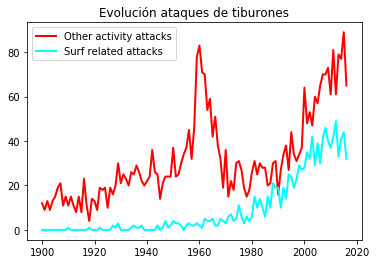

In [62]:
#traslado los datos a una gráfica de evolución
import matplotlib.pyplot as plt
plt.plot('Year','Other activity attacks', data=cool_df, color = 'red', linewidth=2)
plt.plot('Year','Surf related attacks', data=cool_df, color='cyan', linewidth=2)
plt.legend()
plt.title('Evolución ataques de tiburones')

Text(0.5, 1.0, 'Evolución en porcentaje ataques de tiburones')

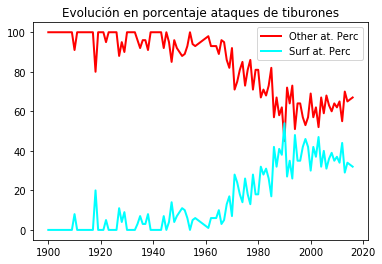

In [63]:
plt.plot('Year','Other at. Perc', data=cool_df, color = 'red', linewidth=2)
plt.plot('Year','Surf at. Perc', data=cool_df, color='cyan', linewidth=2)
plt.legend()
plt.title('Evolución en porcentaje ataques de tiburones')